# PROJECT PHASE 1
**AVIATION ACCIDENTS ANALYSIS**

1. Introduction.

  In line with Our plans to diversify portfolios, by taking interest in purchase  and operating aircrafts,for commercial and private enterprises.I have taken dataset from National Transportation Safety Board (NTSB) that has aviation accidents data from 1962 to 2023.
   Its all about  civil aviation accidents and incidents in USA nad International waters.

Import Standard Libraries

In [1719]:
#import standard libraries to use throught out.
#alias is key here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 

Load dataset into dataframe

In [1720]:
#read dataset from where its stored.
#  loading is critical to ensure its accessibility.
df = pd.read_csv('data/Aviation_Data.csv', low_memory = False)


Data Exploration and preparation

In [1721]:
#getting to know the data
#data knowledge will enable to make clearer analysis
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [1722]:
#overview of the data
#get to know the number of entries and number of objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [1723]:
#how about finding the columns the data has 
#insight into categorization used i.e data columns
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [1724]:
#lets get the summary statics of the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Data cleaning and Data handling 

In [1725]:
#getting to know about missing values
#will assist to eliminate to ensure we get most inform from data with more information
#check the number of missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [1726]:
#check the columns inorder to choose what is irrelevant
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [1727]:
#I think there are many columns which are not important for my analysis.
#  I drop these columns for easier handling of data and clearer analysis
# I am going to drop columns that have roughly more than 25% of their data missing.Quarter makes sense
columns_to_drop = ['Accident.Number','Registration.Number','Amateur.Built','Publication.Date','Report.Status',
'Engine.Type','Latitude','Longitude','Airport.Code','Airport.Name','Aircraft.Category','FAR.Description',
'Schedule','Air.carrier','Broad.phase.of.flight','Report.Status']
df = df.drop(columns=columns_to_drop)
#see columns left and find any similarities
df.head(2)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK


When exploring  the data,I noticed Injury.Severity and Total.fatal.injuries return same data.But Total.FataL.Injuries has many missing data, thus we are going to drop it.We can use Injury.Severity.It will give us more of data neeeded for our analysis.

In [1728]:
#drop the column that has similar data but more missing values
columns_to_drop = ['Total.Fatal.Injuries']
df = df.drop(columns=columns_to_drop)


From the data set provided,we want to find the country featuring alot.This will help select country to focus this analysis.

In [1729]:
#find out country with most dataset entries
df['Country'].value_counts()


Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

We going to focus on United States since its way above 80 % of the dataset.This gives an deeper and better analysis.

Going to change event date to be featuring the year only for better analysis.

In [1730]:
#we going to select United states only

In [1731]:
df = df = df[df['Country'] == 'United States']
df.reset_index(drop=True, inplace=True)

In [1732]:
#changing event.date to year only
df['Event.Date'] = pd.to_datetime(df['Event.Date'], format='%Y-%m-%d')
df['Year'] = df['Event.Date'].dt.year

In [1733]:
df = df[df['Year'] >= 1993]
accidents_by_year = df['Year'].value_counts().sort_index()

Data Visualization

We can have a look at aviation accidents over years.Full narrative descriptions were not much available for dates before 1993,cases under revision and where NTSB didn't have primary investigative obligation.

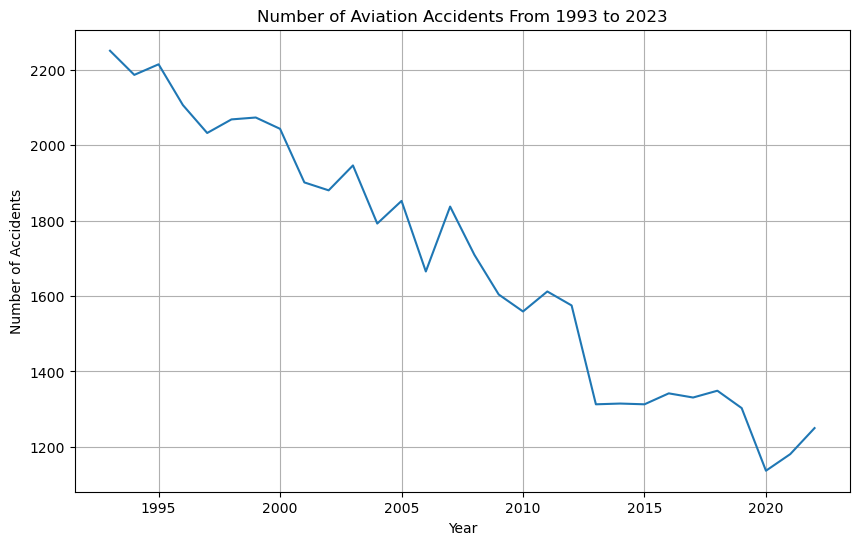

In [1734]:
#line plot for aviation accidents from 1993 to 2023
df = df[df['Year'] >= 1993]
accidents_by_year = df['Year'].value_counts().sort_index()
x = accidents_by_year.index
y =  accidents_by_year.values
plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle= '-')
plt.title('Number of Aviation Accidents From 1993 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()

We can look at the top ten states with accidents.

In [1735]:
# I create new columns using Location for future geographical analysis and visualisations. 
#This was easier on Jupyter notebook by pip install us & import us, but it did not work on Kaggle
# So I ended up creating a list of valid US states codes

valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happend in a particular state
    else:
        return np.nan, np.nan

df[['City', 'State']] = df['Location'].apply(extract_city_state).apply(pd.Series)

In [1736]:
# getting rid of trailing commas in City column
df['City'] = df['City'].str.rstrip(',')

In [1737]:
# having devided Location and Date columns, now we can drop these as well
df.drop(columns=['Event.Date', 'Location'], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12852\1327370354.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cividis', len(top_10_states))


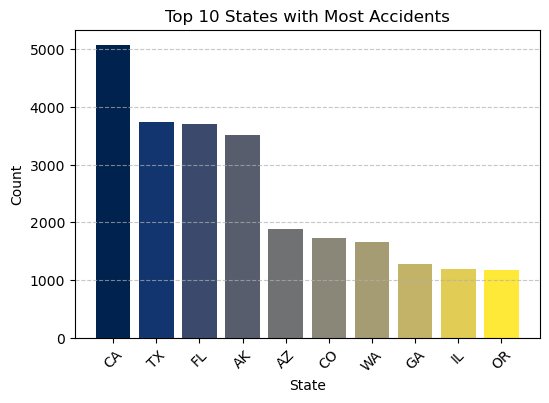

In [1738]:
# Let's have a look at top ten states with most accidents 
top_10_states = df['State'].value_counts().head(10)


cmap = cm.get_cmap('cividis', len(top_10_states))
colors = cmap(range(len(top_10_states)))
x = top_10_states.index
y = top_10_states.values
plt.figure(figsize=(6, 4))
bars = plt.bar(x, y, color=colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

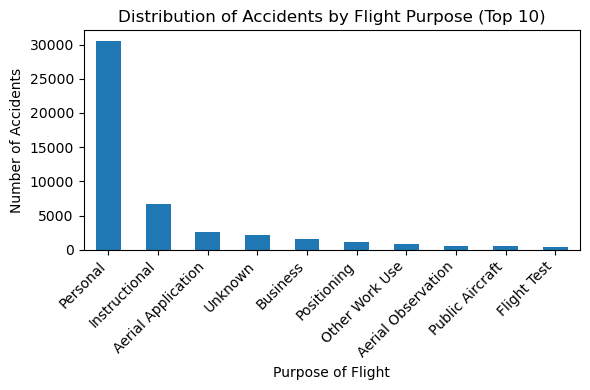

In [1739]:
# Exploring the purpose of flights involved in accidents

top_10_purposes = df['Purpose.of.flight'].value_counts().nlargest(10).sort_values(ascending=False)


plt.figure(figsize=(6, 4))
top_10_purposes.plot(kind='bar')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()
# Significant number of personal flights are responsible for aviation accidents

Try to see relationship between Makes,models and engines types in regard to accidents.

In [1740]:
# Trying to see the relationship between Makes, Models and engine types with accidents 
make_model_accident_counts = df.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
4118,Cessna,152,820
4133,Cessna,172,599
4164,Cessna,172N,508
3442,CESSNA,172,410
10877,Piper,PA-28-140,359
...,...,...,...
6075,FAUNCE,PA-11,1
6076,FDR601 LLC,ZODIAC 601XL,1
6077,FECHTNER,KR-2,1
6078,FEDERSEN WALTER,LANCAIR IVP,1


There is more accidents for the cessna model but this could be due to popularity of these models.

We can explore if there is relationship between weather conditions and accidents.

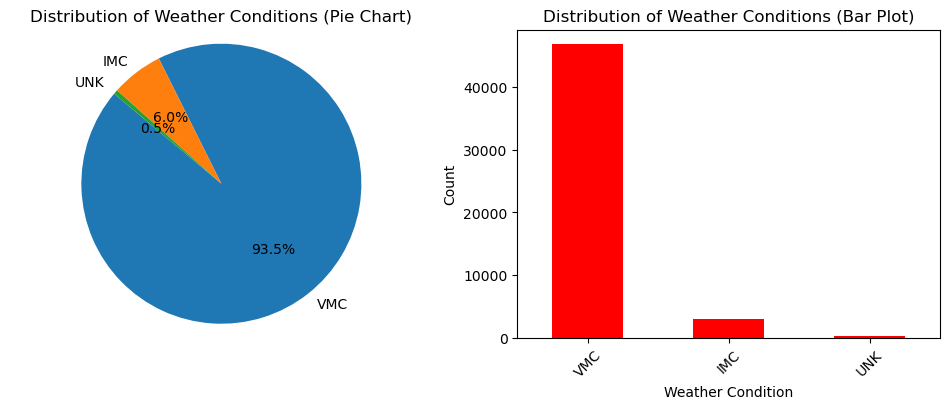

In [1741]:
# I would like to explore if there is a meaningful relationship between wheather condition and accidents

# in Weather column'Unknown' value was writen in both upper and lower cases and it needed to be sorted out
df['Weather.Condition'] = df['Weather.Condition'].str.upper()


weather_counts_updated = df['Weather.Condition'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].pie(weather_counts_updated, labels=weather_counts_updated.index,autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Weather Conditions (Pie Chart)')
axes[0].axis('equal')  



weather_counts_updated.plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title('Distribution of Weather Conditions (Bar Plot)')
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

From the above, most accidents occur in VMC weather condition whic more favourable for pilots.Thus more flights are in opretion during this time.

**CONCLUSION**

Its clear there has been a decrease in accident since 1993 thus encouraging to venture in the industry.There are still states like California and Texas still reporting high accidents.Regular reviews and updates of measure like safety protocols ,regulations and procudures will keep you afloat.

Most accidents occur in good weather conditions,meaning most Pilots could be less vigilant and also drop there guard.There could be incidents of laxity,excessive speed and less observation of safety protocols.To cater for this,I recommend refresher training and creating awarenes to remind Pilots of safety protocls during good weather conditions.

Personal flights is cause for mst accidents.Thus venturing in commercial flights gives as an edge of less accidents.Due to safety protocols and regular trainings We are guaranteed to avoid such.

Finally purchase should be focused on model with less accidents.It will be cost effective and less cost on repairs or replacements
